# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - identificação unica para cada venda
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros
- sqft_living - tamanho da casa em metros quadrados
- sqft_lot - tamanho do lote em metros quadrados
- floors - número de andares
- waterfront - vista para praia
- view - visitado
- condition - condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County)
- sqft_above - tamanho da área abaixo da casa em metros quadrados
- sqft_basement - tamanho do porão em metros quadrados
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - CEP
- lat - latitude
- long - longitude
- sqft_living15 - área da casa em 2015 (implica a algumas reformas). Isso pode ou não ter afetado a área do lote
- sqft_lot15 - área do lote em 2015 (implica a algumas reformas)

# Sobre este projeto

Este é o seu primeiro projeto usando Ciência de Dados. Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão linear e justificar

# Preparação do ambiente

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download.

In [ ]:
# Preparação dos dados e bibliotecas

import pandas as pd
import numpy as np

from patsy import dmatrices
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_selection import RFE

df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Exercicio 1. (0.5 pontos)

Formule ao menos duas perguntas que você acha que poderiam ser respondidas usando os dados

**RESPOSTA** (VALE 0.5 pontos):  
Através dos dados apresentados, poderiamos responder, por exemplo, como o tamanho da casa (sqft_living) afeta o preço de uma casa.

Também poderiamos verificar se há diferenças na qualidade das casas (grade) de acordo com região através das variáveis 'zipcode', 'lat' e 'long'.

# Exercicio 2. (2.5 pontos)

A capacidade de comunicação é um dos principais pontos na análise de dados, pois sua análise deve ser tão boa quanto a sua capacidade de comunicá-la. Para isso usamos tabelas resumo e gráficos para apresentar os principais achados do trabalho realizado. Podemos adicionar outros materias que possam aprofundar essa apresentação como artigos e outros estudos realizados.

Assim, qual visualização você acha interessante destacar?

**RESPOSTA** (VALE 0.75 pontos):  
O *Scatter plot* é um tipo de visualização capaz mostrar algumas caracteristicas importantes das variaveis do dataset. De forma geral, o *Scatter plot* é utilizado para mostrar a relação entre duas variáveis ou a ausência dessa relação.  
    
Esse tipo de visualização ainda é capaz de mostrar outros padrões nos dados, como por exemplo, outliers ou dados agrupados. Sendo assim, torna-se uma visualização importante de se destacar.

Text(0, 0.5, 'Preço')

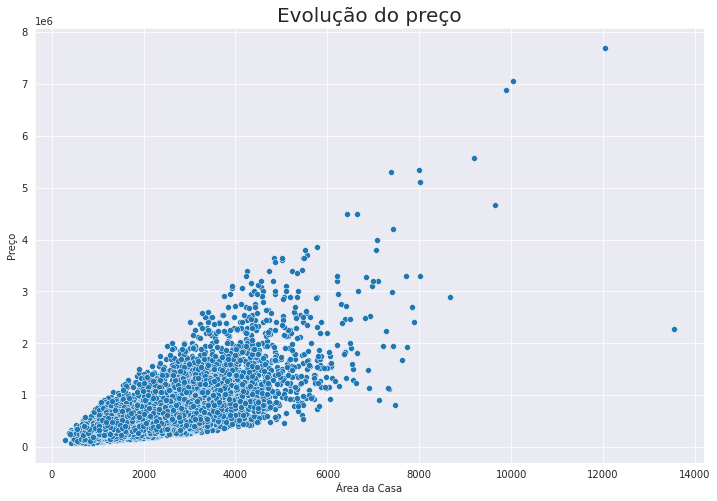

In [ ]:
#### (VALE 1.5 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

sns.set_style('darkgrid')
plt.figure(figsize=[12,8])
grafico = sns.scatterplot(data=df, x="sqft_living", y="price")
grafico.set_title('Evolução do preço', loc='center', fontsize=20)
grafico.set_xlabel('Área da Casa', fontsize=10)
grafico.set_ylabel('Preço', fontsize=10)

A sua visualização responde uma das suas perguntas? Se não, o que ela responde?

**RESPOSTA** (VALE 0.75 pontos):  
Sim, a analise mostra que o preço de casa tem uma relação linear positiva em relação a área da casa. Ainda podemos detectar <u>**possíveis**</u> outliers (diversos pontos estão separados do grupo principal), dessa forma, seria necessaria uma análise mais aprofundada neste ponto.

# Exercicio 3. (3 pontos)

Faremos uma analise exploratoria sobre estes dados, preencha abaixo analises sobre o conjunto de dados. Para isso a biblioteca numpy para obter a contagem, média, mediana e os quartis.

In [ ]:
#### (VALE 0.75 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

observacoes = df.shape[0] # Cada linha pode ser encarada como uma observação
variaveis = df.shape[1] # Cada coluna pode ser encarada como uma variável

# Segundo o dicionário de dados, a variável sqft_living trata do tamanho da casa
# Para tamanho médio em metros quadrados é necessario transformar de pés para metros, 1 pé quadrado = 0.092903 metro quadrado
# O valor será arredondado para duas casas decimais
df['sqm_living'] = round(df['sqft_living']*0.092903,2)

media_tamanho = round(df['sqm_living'].mean(),2)
mediana_tamanho = df['sqm_living'].median()
p_quartil = df['sqm_living'].quantile(0.25) # 1º Quartil -> 25% das observações
t_quartil = df['sqm_living'].quantile(0.75)  # 3º Quartil -> 75% das observações

In [ ]:
# VALE 0.75 pontos
# Substitua __ pelos valores solicitados
print('Existem {} observações no conjunto de dados'.format(observacoes))
print('Existem {} variaveis no conjunto de dados'.format(variaveis))
print('O tamanho médio das casas é de {} metros quadrados'.format(media_tamanho))
print('A mediana do tamanho das casas é de {} metros quadrados'.format(mediana_tamanho))

# Quartis
print('primeiro quartil {} do tamanho das casas'.format(p_quartil))
print('terceiro quartil {} do tamanho das casas'.format(t_quartil))

Existem 21613 observações no conjunto de dados
Existem 21 variaveis no conjunto de dados
O tamanho médio das casas é de 193.23 metros quadrados
A mediana do tamanho das casas é de 177.44 metros quadrados
primeiro quartil 132.57 do tamanho das casas
terceiro quartil 236.9 do tamanho das casas


In [ ]:
# Ainda há a opção dos quartis em pés quadrados ao invés de metros quadrados

p_quartil = df['sqft_living'].quantile(0.25) # 1º Quartil -> 25% das observações
t_quartil = df['sqft_living'].quantile(0.75)  # 3º Quartil -> 75% das observações

print('primeiro quartil {} do tamanho das casas'.format(p_quartil))
print('terceiro quartil {} do tamanho das casas'.format(t_quartil))

primeiro quartil 1427.0 do tamanho das casas
terceiro quartil 2550.0 do tamanho das casas


Neste conjunto de dados há casas com tamanho muito acima ou abaixo do esperado (outliers)? Faça um gráfico de caixa (boxplot) do tamanho das casas.

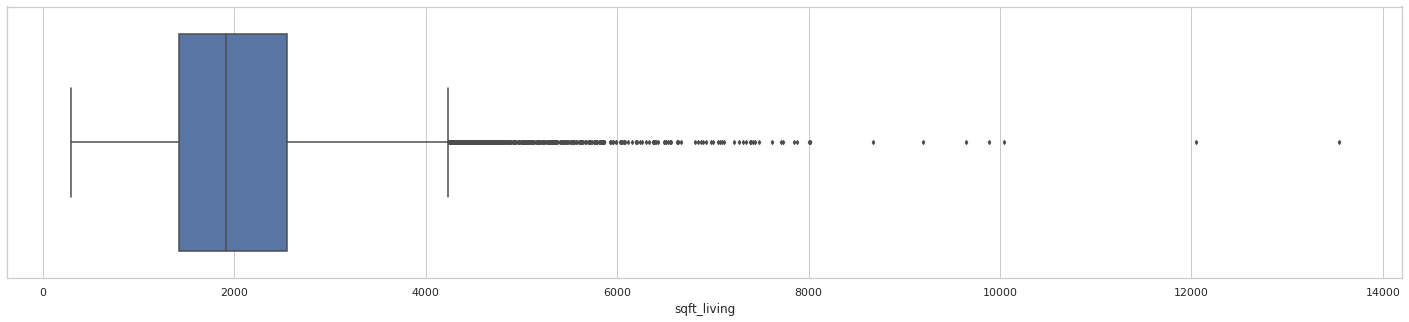

In [ ]:
#### (VALE 0.75 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

sns.set_theme(style="whitegrid")
plt.figure(figsize=[25,5])
ax = sns.boxplot(x=df["sqft_living"], fliersize = 3)

Observando a sua visualização, há casas com tamanhos muito abaixo ou acima do esperado (outliers)? 

**RESPOSTA** (VALE 0.75 pontos):  
Sim, de acordo com a visualização, os pontos que excedem o limite superior são casas de tamanhos extremos.

# Exercicio 4. (4 pontos)

Construa um modelo de regressão linear para predizer a variável **price** (preço) com **statsmodels.api**.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Ajuste das colunas ao formato aceito em dmatrices
# id e date, apesar de numéricas, servem para rotular os dados e não entram na regressão.
# sqm_living trata da conversão de sqft_living para metros quadrados e não será utilizada.
# price é a variável target, será declarada separadamente na função dmatrices.
colunas = ' + '.join(str(i) for i in df.drop(['id','date','sqm_living','price'], axis=1).columns)

# Criação das matrizes de design
y, X = dmatrices(f'price ~ {colunas}', data=df, return_type='dataframe')

In [ ]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [ ]:
X.head()

,Intercept,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,1.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,1.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,1.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [ ]:
modelo = sm.OLS(y,X)
res = modelo.fit()

Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE O COMANDO ABAIXO

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.69e+06   2.93e+06      2.282

Faça outro modelo usando a biblioteca **sklearn**.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
X = X.drop('Intercept',axis=1) # sklearn não precisa da coluna intercept
X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(round(r2_score(y_test,y_pred),4))
print(round(mean_absolute_error(y_test, y_pred),0))

0.7099
122986.0


Qual o valor de ${R}^{2}$ e $MAE$ obtido?

**RESPOSTA** (VALE 0.5 pontos):   
${R}^{2}$ = 0.7099  
$MAE$ = 122986.0

Faça novamente um novo modelo utilizando a seleção de caracteristicas, selecionando as 5 variaveis mais importantes.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

estimator = LinearRegression()

selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.get_feature_names_out()

array(['waterfront', 'view', 'grade', 'lat', 'long'], dtype=object)

In [ ]:
X_ajustado = X[selector.get_feature_names_out()]

X_ajustado_std = StandardScaler().fit_transform(X_ajustado)
X_ajustado_train, X_ajustado_test, y_train, y_test = train_test_split(X_ajustado_std, y, test_size=0.3, random_state=10)

modelo = LinearRegression()
modelo = modelo.fit(X_ajustado_train, y_train)
y_pred = modelo.predict(X_ajustado_test)

print(round(r2_score(y_test,y_pred),4))
print(round(mean_absolute_error(y_test, y_pred),0))

0.5645
148263.0


Quais são as 5 variaveis mais importantes deste conjunto de dados?

**RESPOSTA** (VALE 0.5 pontos):  
As variáveis mais importantes são 'waterfront', 'view', 'grade', 'lat' e 'long'

Qual o valor de ${R}^{2}$ e $MAE$ deste novo modelo? Este modelo é melhor do que o anterior?

**RESPOSTA** (VALE 0.5 pontos):  
Com todas as variáveis:  
R2 = 0.7099  
MAE = 122986.0

Com as 5 mais importantes:  
R2 = 0.5645  
MAE = 148263.0

As métricas apontam que o novo modelo é <u>**pior**</u> que o anterior.